In [99]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

[((-1, 1, 0), {'battery_node': 'True'}), ((-3, 5, -2), {'battery_node': 'True'}), ((-2, 3, -1), {'battery_node': 'True'}), ((-2, 4, -2), {}), ((0, 0, 0), {}), ((-1, 2, -1), {}), ((-2, 5, -3), {}), ((0, 1, -1), {}), ((-1, 3, -2), {})]
[((-1, 1, 0), (-1, 2, -1), {'weight': 8.2765997326135607e-26}), ((-1, 1, 0), (0, 0, 0), {'weight': 0.99999999999782085}), ((-1, 1, 0), (0, 1, -1), {'weight': 1000}), ((-3, 5, -2), (-2, 5, -3), {'weight': 1000}), ((-3, 5, -2), (-2, 4, -2), {'weight': 1.0}), ((-2, 3, -1), (-1, 2, -1), {'weight': 1.0}), ((-2, 3, -1), (-1, 3, -2), {'weight': 1000}), ((-2, 3, -1), (-2, 4, -2), {'weight': 1.1939244838284226e-52}), ((-2, 4, -2), (-1, 3, -2), {'weight': 1.0}), ((-2, 4, -2), (-3, 5, -2), {'weight': 4.5346034200255662e-66}), ((-2, 4, -2), (-2, 3, -1), {'weight': 1.0}), ((-2, 4, -2), (-2, 5, -3), {'weight': 4.5346034200255662e-66}), ((0, 0, 0), (-1, 1, 0), {'weight': 2.1791619130191637e-12}), ((0, 0, 0), (0, 1, -1), {'weight': 2.1791619130191637e-12}), ((-1, 2, -1), 

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:25: ComplexWarning: Casting complex values to real discards the imaginary part


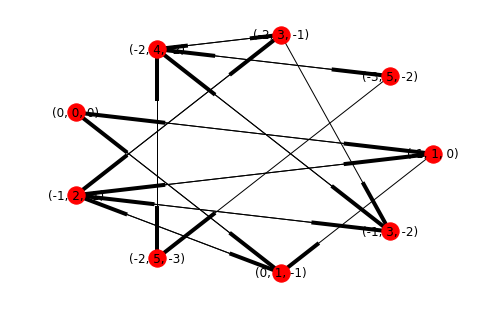

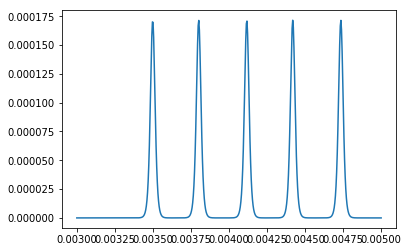

In [108]:
import dot_classifier
reload(dot_classifier)
import thomas_fermi
reload(thomas_fermi)
import markov_graph
reload(markov_graph)

N_v_points = 500
V_d_vec = np.linspace(3e-3,5e-3,N_v_points)
I_vec = np.zeros(N_v_points)

x = np.arange(3)
K = thomas_fermi.create_K_matrix(x,E_scale=1e-3)

for i in range(N_v_points):
    V = np.array([5e-3,V_d_vec[i],5e-3])
    mu_l = (10e-3,10e-3)
    
    graph_model = (5,1)
    battery_weight = 1000
    kT = 10e-6
    physics = (x,V,K,mu_l,battery_weight,kT)
    G = markov_graph.generate_graph(graph_model, physics)

    I_vec[i] = markov_graph.get_current(G)

print G.nodes(data=True)
print G.edges(data=True)

plt.figure(1)
nx.draw_shell(G,with_labels=True)

plt.figure(2)
plt.plot(V_d_vec,I_vec)


-3.2656378419e-15


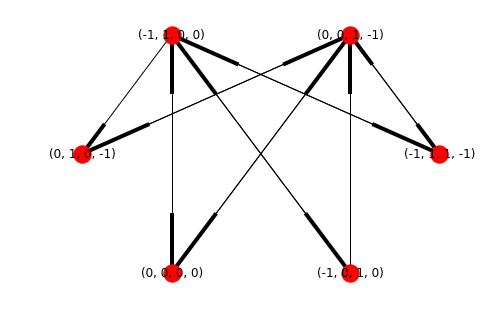

In [91]:
import markov_graph
reload(markov_graph)
graph_model = (1,1)
battery_weight = 1000
kT = 0.1
physics = (x,V,K,mu_l,battery_weight,kT)
G = markov_graph.generate_graph(graph_model, physics)

#print G.nodes(data=True)
#print G.edges(data=True)

import networkx as nx
%matplotlib inlinegt
nx.draw_shell(G,with_labels=True)

print markov_graph.get_current(G)